In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils

In [2]:
n = 100

In [3]:
#Height, weight, age
mu = [180,80,40]
sigma_all_corr = [[20**2, 240, 100],[240,15**2,45],[100,45,10**2]]
sigma_no_cross = [[20**2, 240, 100],[240,15**2,0],[100,0,10**2]]

In [4]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [5]:
print(is_pos_def(sigma_no_cross))
print(is_pos_def(sigma_all_corr))

True
True


In [6]:
data_cross_corr = np.random.multivariate_normal(mu ,sigma_all_corr, size = n)
data_no_cross = np.random.multivariate_normal(mu ,sigma_no_cross, size = n)

In [7]:
def random_missing_distr(data):
    missing = np.random.binomial(n = 1, p=0.3, size = n)
    y_o = [d for d, m in zip(data[:,0], missing) if m ==0]
    y_m = [d for d, m in zip(data[:,0], missing) if m ==1]
    print(np.mean(y_o), np.std(y_o))
    print(np.mean(y_m), np.std(y_m))
    plt.hist(y_o)
    plt.show()
    plt.hist(y_m)
    plt.show()

def mar_missing_distr(data):
    y_o = [d for d, m in zip(data[:,0], data[:,1]) if m <=102.5] #1.5std
    y_m = [d for d, m in zip(data[:,0], data[:,1]) if m >=102.5]
    print(np.mean(y_o), np.std(y_o))
    print(np.mean(y_m), np.std(y_m))
    plt.hist(y_o)
    plt.show()
    plt.hist(y_m)
    plt.show()

180.51522717583933 18.402171879767135
183.5250857661446 18.31663931160765


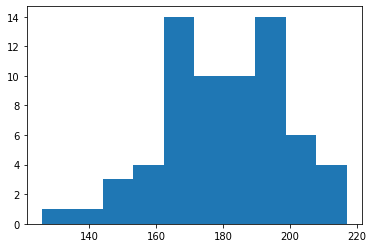

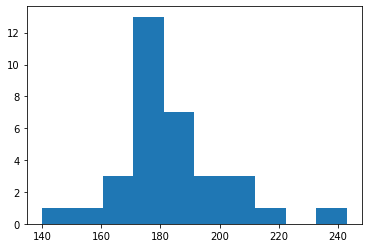

181.6677152801998 20.314820890752006
179.49443271658618 17.748056548889185


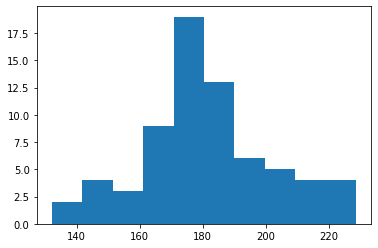

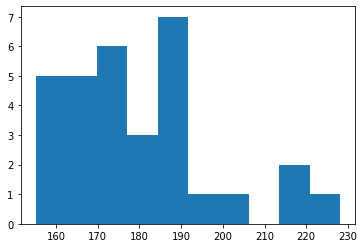

In [8]:
random_missing_distr(data_cross_corr)
random_missing_distr(data_no_cross)

179.74359240592102 16.779809015429425
215.04135450030313 16.087791898584577


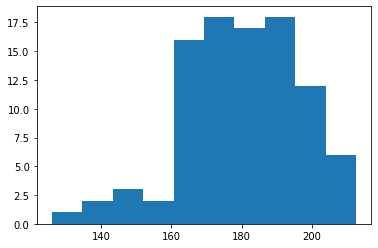

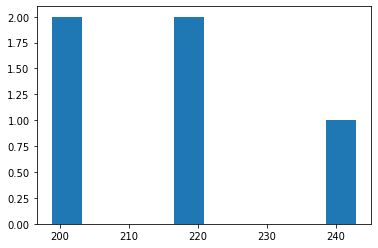

178.0618814496652 16.863072707678608
219.94925624701318 8.225894680392672


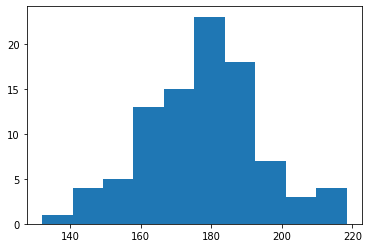

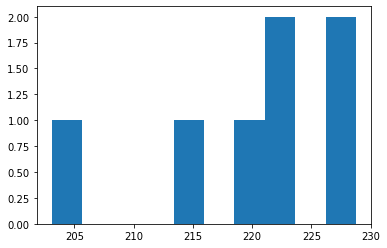

In [9]:
mar_missing_distr(data_cross_corr)
mar_missing_distr(data_no_cross)

In [32]:
size = 50000

In [65]:
#Categorical data
x_1 = np.random.binomial(1, 0.2, size = size)
x_2 = np.random.binomial(1,0.65, size = size)
y = np.around(utils.sigmoid(x_1*40+x_2*20, alpha = 19)).astype(int)
synth_cat = pd.DataFrame({"y": y, "x_1":x_1, "x_2":x_2})
synth_cat_test = synth_cat.iloc[:round(0.3*size),:]
synth_cat_train = synth_cat.iloc[round(0.3*size):,:]

In [13]:
#SPD test
t_1 = np.random.binomial(1,0.5, size = size)
y = np.around(utils.sigmoid(t_1*20, alpha = 1)).astype(int)

In [14]:
utils.spd(y, t_1)

1.0

In [67]:
print("Class 1: ",len(synth_cat_train[synth_cat_train["x_2"]==1])/len(synth_cat_train) ,
    "\nClass 2: ", len(synth_cat_train[synth_cat_train["x_2"]==0])/len(synth_cat_train))
temp = synth_cat_train.copy()
print(utils.spd(temp["y"], temp["x_2"]))
temp = utils.data_remover_cat(temp, "x_1", 30)
print(utils.spd(temp["y"], temp["x_2"]))
print("Class 1: ",len(temp[temp["x_2"]==1])/len(temp) ,
    "\nClass 2: ", len(temp[temp["x_2"]==0])/len(temp))

Class 1:  0.6507142857142857 
Class 2:  0.3492857142857143
0.8044989775051125


ZeroDivisionError: division by zero

In [ ]:
utils.spd(temp["y"], temp["x_2"])

0.5200142936262977

In [ ]:
print("Class 1: ",len(synth_cat_train[synth_cat_train["x_2"]==1])/len(synth_cat_train) ,
    "\nClass 2: ", len(synth_cat_train[synth_cat_train["x_2"]==0])/len(synth_cat_train))
temp = synth_cat_train.copy()
temp = utils.data_remover_cat(temp, "x_2", 30)
print("Class 1: ",len(temp[temp["x_2"]==1])/len(temp) ,
    "\nClass 2: ", len(temp[temp["x_2"]==0])/len(temp))


Class 1:  0.6470571428571429 
Class 2:  0.35294285714285717
Class 1:  0.709469387755102 
Class 2:  0.29053061224489796


In [ ]:
#res2 = test_bench(synth_cat_train, synth_cat_test, "y", "x_1", "x_2")

In [ ]:
res = utils.test_bench(synth_cat_train, synth_cat_test, "y", "x_2", "x_2")

NameError: free variable 'imp' referenced before assignment in enclosing scope

In [ ]:
#res.keys()

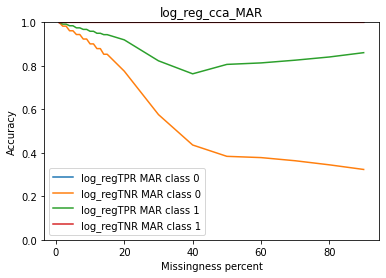

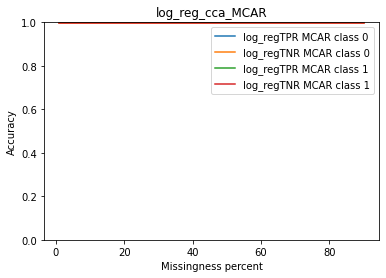

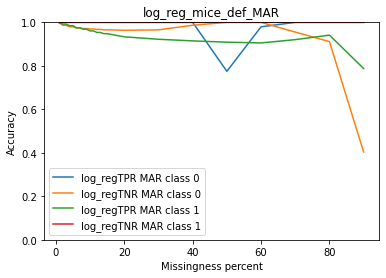

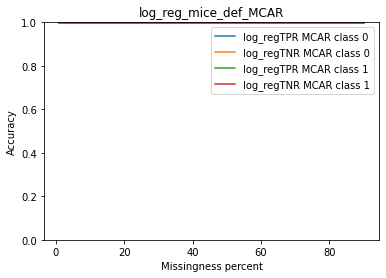

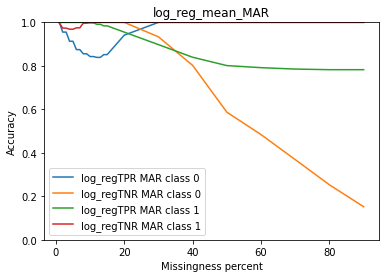

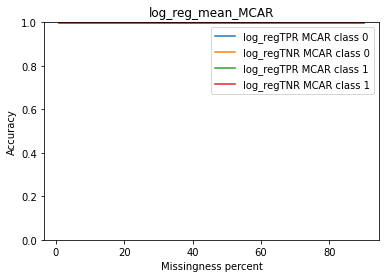

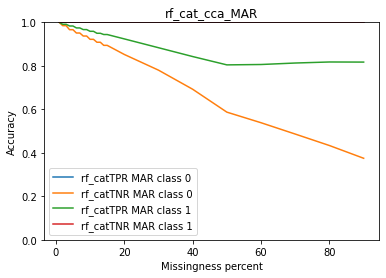

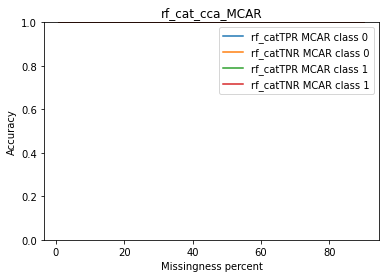

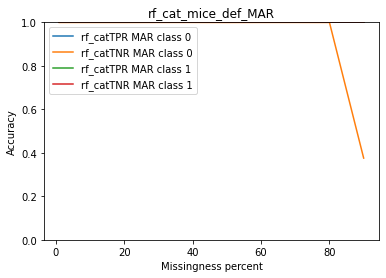

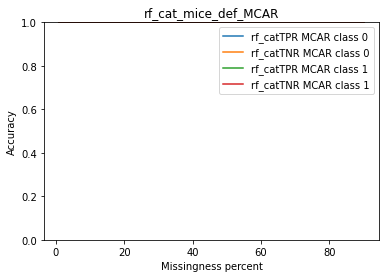

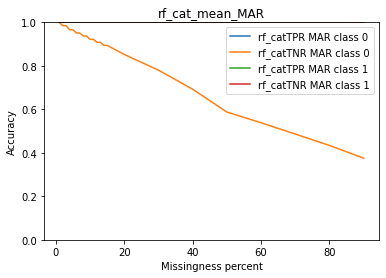

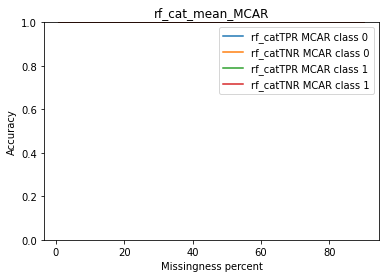

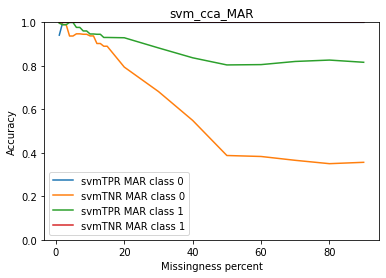

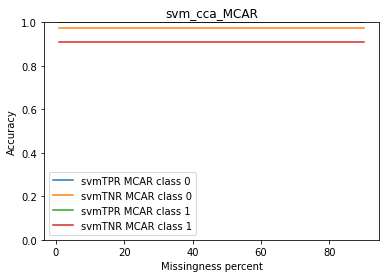

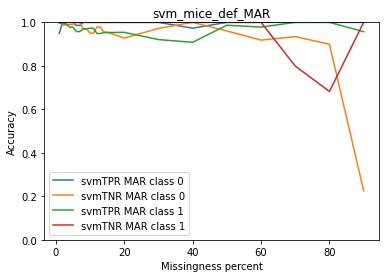

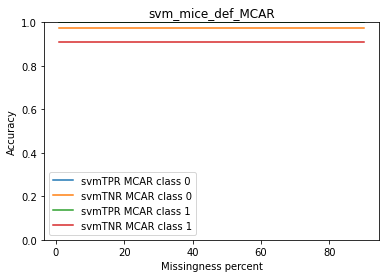

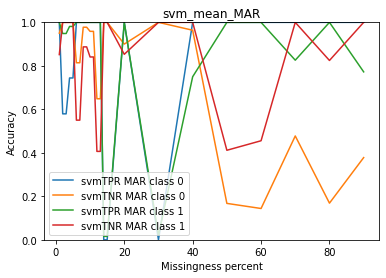

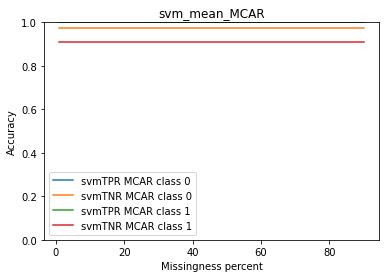

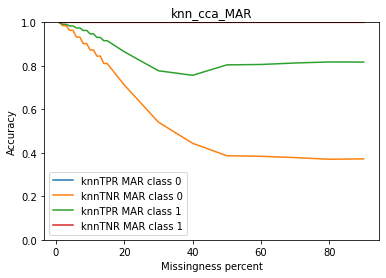

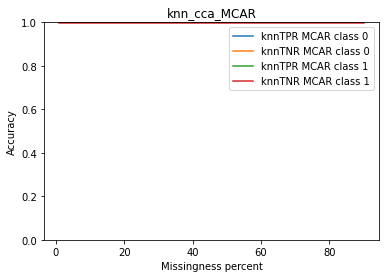

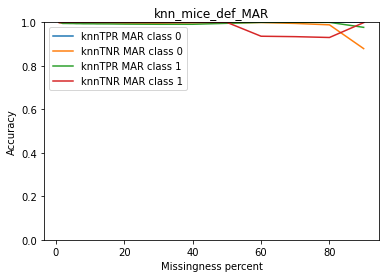

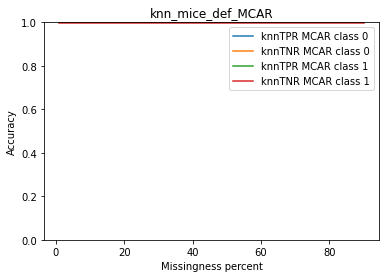

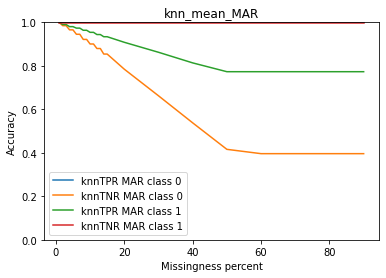

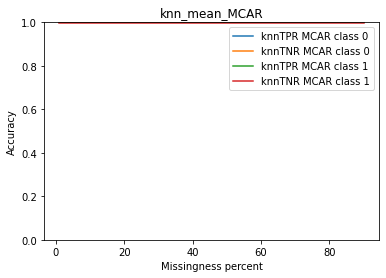

In [ ]:
try:
    utils.plotting(["log_reg", "rf_cat", "svm", "knn"],["cca", "mice_def", "mean"], res)
except Exception as e:
    print(e)

In [ ]:
res2 = test_bench(synth_cat_train, synth_cat_test, "y", "x_1")

TypeError: test_bench() missing 1 required positional argument: 'sensitive'

In [ ]:
np.sqrt(155**2+130**2)

202.2992832414391